<a href="https://colab.research.google.com/github/miguelmota2301/Ridge-Regression/blob/main/Ridge_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTANDO BIBLIOTECAS E FUNÇÕES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 

In [ ]:
#IMPORTANDO O DRIVE PARA COLETAR OS DADOS
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#DADOS QUE SERÃO UTILIZADOS PARA FAZER O RIDGE
dados = pd.read_excel("/content/drive/MyDrive/Cópia de 2019volleyball.xlsx")
dados.head()

,Nome,Ranking Geral,Ranking em 2020,Nacionalidade,Posição,Data de Nascimento,Altura (cm),Peso (kg),Salto (cm),Bloqueio (cm),Mão Dominante,Pontos do país,Pontos
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,320.0,1190.0
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,NaN,220.0,833.0
2,Gabriela GuimarÃ£es,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,220.0,788.0
3,Tijana BoÅ¡koviÄ,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,252.0,630.5
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,165.0,597.0


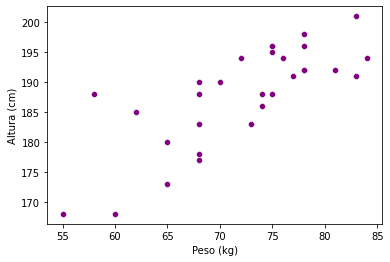

In [ ]:
#GRÁFICO SCATTER ALTURA X PESO
sns.scatterplot(y = 'Altura (cm)', x = 'Peso (kg)', data = dados, color="purple")
plt.show()

In [ ]:
#SEPARANDO A FEATURE MATRIX E O TARGET VECTOR
X = dados["Peso (kg)"]
y = dados["Altura (cm)"]

In [ ]:
#REDIMENSIONANDO X
X = X.values.reshape(-1,1)
print(f"Shape:{X.shape}\nNº de dimensões:{X.ndim}")

Shape:(30, 1)
Nº de dimensões:2


In [ ]:
#SEPARANDO OS DADOS ENTRE TREINO E TESTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
#RIDGE REGRESSION COM ALPHA 1.0 E PRINTAR OS VALORES DE βn
pipeline = Ridge(alpha = 1.0)
pipeline.fit(X_train, y_train)
beta0 = pipeline.intercept_
beta1 = pipeline.coef_
print(f"β0:\t{beta0}")
print(f"β1:\t{beta1}")

β0:	123.71463472298841
β1:	[0.88478209]


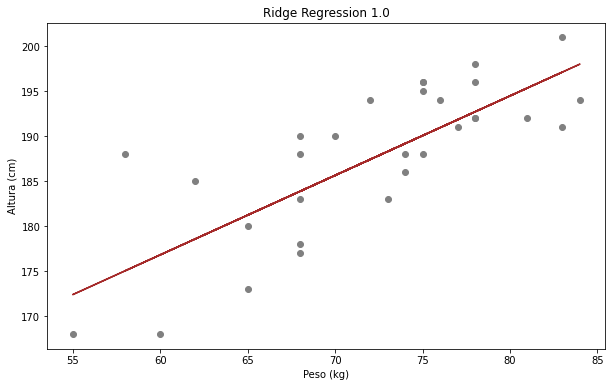

In [ ]:
#PLOTAR O GRÁFICO DE RIDGE REGRESSION 1.0
plt.figure(figsize=(10,6))
plt.scatter(X,y, color = "grey")
plt.plot(X, beta0 + beta1*X, color="brown")
plt.title("Ridge Regression 1.0")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
#RIDGE REGRESSION COM ALPHA 100000 E PRINTAR OS VALORES DE βn
pipelinecemmil = Ridge(alpha=100000)
pipelinecemmil.fit(X_train, y_train)
print(f"β0:\t{pipelinecemmil.coef_}")
print(f"β1:\t{pipelinecemmil.intercept_}")

β0:	[0.00531413]
β1:	189.5072141008431


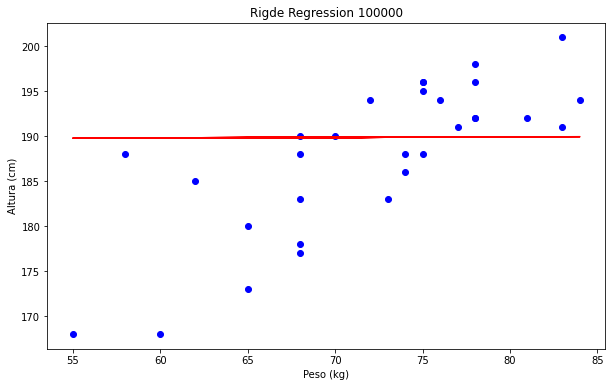

In [ ]:
#PLOTAR O GRÁFICO DE RIDGE REGRESSIO 100000
plt.figure(figsize=(10,6))
plt.scatter(X,y, color = "blue")
plt.plot(X, pipelinecemmil.intercept_ + pipelinecemmil.coef_*X, color= "red")
plt.title("Rigde Regression 100000")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
#RIDGE REGRESSION COM ALPHA 0.0001 E PRINTAR OS VALORES DE βn
pipelinepequena = Ridge(alpha=0.0001)
pipelinepequena.fit(X_train,y_train)
print(f"β0:\t{pipelinepequena.intercept_}")
print(f"β1:\t{pipelinepequena.coef_}")

β0:	123.6049210001315
β1:	[0.88624867]


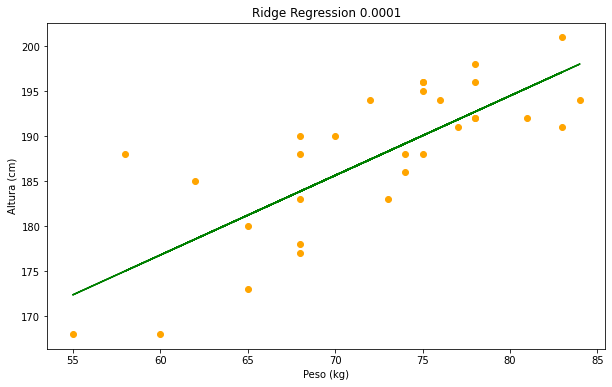

In [ ]:
#PLOTAR O GRÁFICO DE RIDGE REGRESSION 0.0001
plt.figure(figsize=(10,6))
plt.scatter(X,y, color = "orange")
plt.plot(X, pipelinepequena.intercept_ + pipelinepequena.coef_*X, color = "green")
plt.title("Ridge Regression 0.0001")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
#TREINAR O MODELO A PARTIR DE LINEAR REGRESSION
linear = LinearRegression()
linear.fit(X_train, y_train)
print(f"β0:\t{linear.coef_}")
print(f"β1:\t{linear.intercept_}")

β0:	[0.88624882]
β1:	123.60491000947269


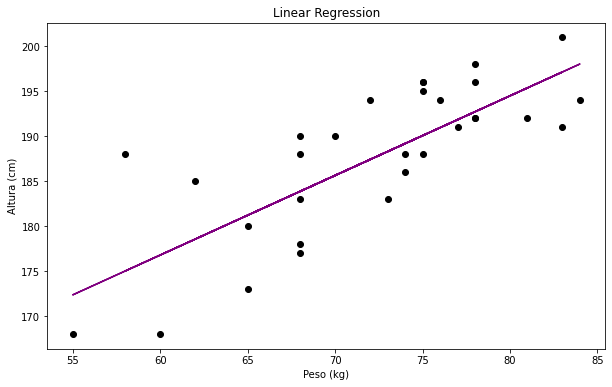

In [ ]:
#PLOTAR O GRÁFICO DE LINEAR REGRESSION
plt.figure(figsize=(10,6))
plt.scatter(X,y, color = "black")
plt.plot(X, linear.intercept_ + linear.coef_*X, color = "purple")
plt.title("Linear Regression")
plt.xlabel("Peso (kg)")
plt.ylabel("Altura (cm)")
plt.show()

In [ ]:
#PREDIÇÃO DE VALORES A PARTIR DOS DADOS DE TESTE
y_pred = pipeline.predict(X_test)
y_predcemmil = pipelinecemmil.predict(X_test)
y_predpequena = pipelinepequena.predict(X_test)
y_predlinear = linear.predict(X_test)

In [ ]:
#ERROS DE CADA UMA DAS PREDIÇÕES DOS DIFERENTES VALORES DE ALPHA
erros = pd.DataFrame({'alpha' : [1.0, 100000, 0.0001, 0],
                      'R²' : [r2_score(y_test, y_pred), r2_score(y_test, y_predcemmil), r2_score(y_test, y_predpequena), r2_score(y_test, y_predlinear)],
                      'MSE' : [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_predcemmil), mean_squared_error(y_test, y_predpequena), mean_squared_error(y_test, y_predlinear)],
                      'MAE' : [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_predcemmil), mean_absolute_error(y_test, y_predpequena), mean_absolute_error(y_test, y_predlinear)]
})

erros

,alpha,R²,MSE,MAE
0,1.0000,0.513705,47.008522,5.879642
1,100000.0000,-0.480601,143.124741,9.364618
2,0.0001,0.513553,47.023242,5.877066
3,0.0000,0.513553,47.023244,5.877066
